In [ ]:
import os

base_path = os.path.join("data", "AffectNet_unzipped", "affectnet_cleaned")
emotion_classes = ['anger', 'happy', 'sad', 'surprise']

emotion_counts = {}
for emo in emotion_classes:
    folder_path = os.path.join(base_path, emo)
    count = len(os.listdir(folder_path))
    emotion_counts[emo] = count

print("감정별 이미지 수:\n", emotion_counts)

감정별 이미지 수:
 {'anger': 4149, 'happy': 4330, 'sad': 3344, 'surprise': 4764}


#### 감정비율 파이 차트

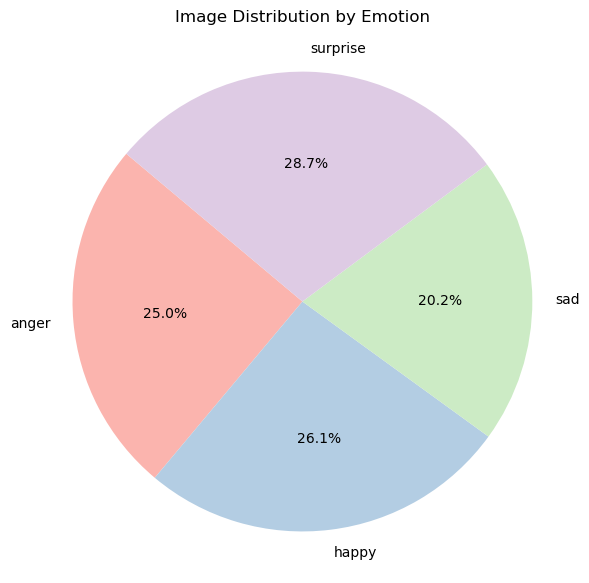

In [4]:
import matplotlib.pyplot as plt

# 이전 단계에서 만든 emotion_counts 사용
labels = list(emotion_counts.keys())
sizes = list(emotion_counts.values())

plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=plt.cm.Pastel1.colors)
plt.axis('equal')  # 원형 유지
plt.title("Image Distribution by Emotion")
plt.tight_layout()
plt.show()

#### 이미지 해상도 분포 확인 (샘플 100장 정도)

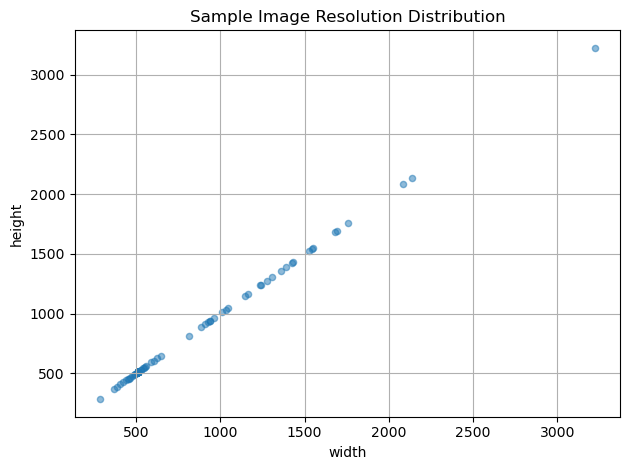

In [6]:
from PIL import Image
import random

img_shapes = []
folder_paths = [os.path.join(base_path, emo) for emo in emotion_classes]

# 감정별 폴더에서 무작위로 100개 이미지 경로 수집
all_images = []
for folder in folder_paths:
    files = os.listdir(folder)
    random.shuffle(files)
    all_images.extend([os.path.join(folder, f) for f in files[:25]])  # 총 4감정 x 25장

# 이미지 크기 측정
for path in all_images:
    try:
        with Image.open(path) as img:
            img_shapes.append(img.size)  # (width, height)
    except:
        continue

# 시각화
import pandas as pd
shape_df = pd.DataFrame(img_shapes, columns=["width", "height"])
shape_df.plot(kind='scatter', x='width', y='height', alpha=0.5, title="Sample Image Resolution Distribution")
plt.grid(True)
plt.tight_layout()
plt.show()

	•	이미지 해상도는 균일하지 않고 매우 다양함.
	•	따라서 모델 학습을 위해선 다음 중 하나가 필요:
	•	공통 해상도로 resize (예: 128×128, 224×224)
	•	고해상도 데이터 제외 또는 따로 처리

#### 샘플 이미지 시각화

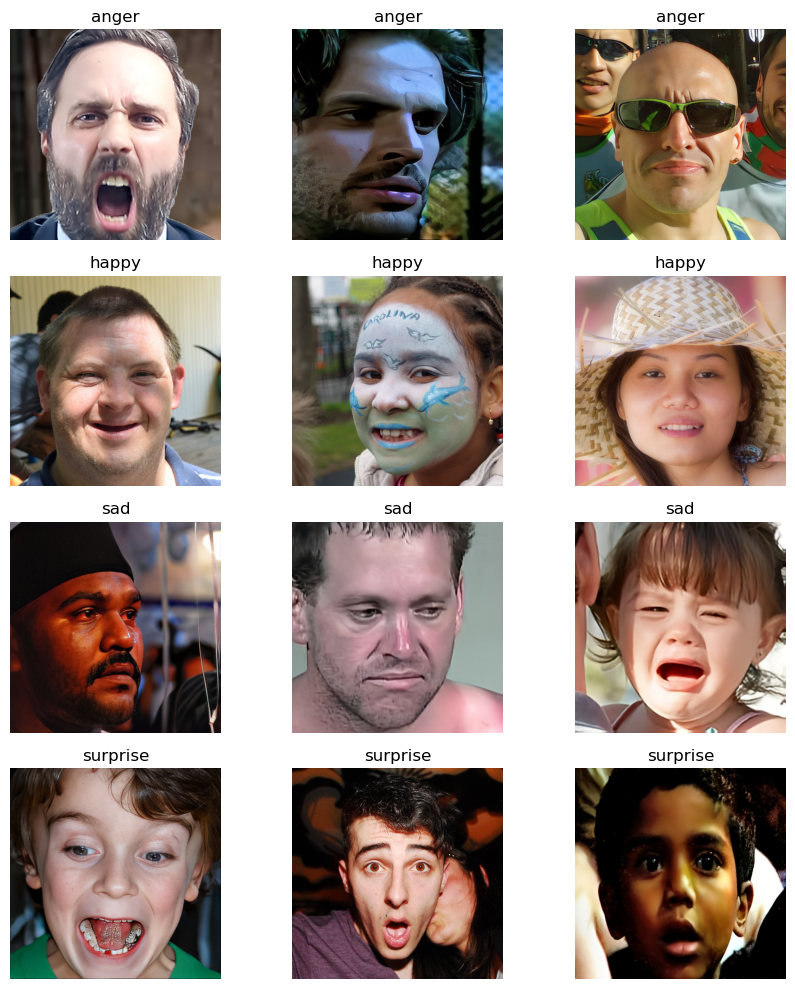

In [7]:
fig, axes = plt.subplots(4, 3, figsize=(9, 10))  # 4행 3열 (4개 감정 * 3장)
axes = axes.flatten()

for idx, emotion in enumerate(emotion_classes):
    folder = os.path.join(base_path, emotion)
    files = os.listdir(folder)
    sample_imgs = random.sample(files, 3)

    for j, img_file in enumerate(sample_imgs):
        img_path = os.path.join(folder, img_file)
        with Image.open(img_path) as img:
            axes[idx*3 + j].imshow(img)
            axes[idx*3 + j].axis('off')
            axes[idx*3 + j].set_title(emotion)

plt.tight_layout()
plt.show()